In [3]:
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
from sklearn.metrics import accuracy_score
from sklearn.datasets import load_digits
from sklearn.svm import SVC
import matplotlib as plt
from sklearn.metrics import confusion_matrix
import seaborn as sns # 数据可视化的包

In [4]:
# 加载数据
digits = load_digits()
data = digits.data
# 查看数据集大小
data.shape

(1797, 64)

In [5]:
# 获取第一张图片的像素数
print(digits.images[0])

[[ 0.  0.  5. 13.  9.  1.  0.  0.]
 [ 0.  0. 13. 15. 10. 15.  5.  0.]
 [ 0.  3. 15.  2.  0. 11.  8.  0.]
 [ 0.  4. 12.  0.  0.  8.  8.  0.]
 [ 0.  5.  8.  0.  0.  9.  8.  0.]
 [ 0.  4. 11.  0.  1. 12.  7.  0.]
 [ 0.  2. 14.  5. 10. 12.  0.  0.]
 [ 0.  0.  6. 13. 10.  0.  0.  0.]]


In [6]:
# 将25%的数据作为测试集，其余作为训练集
train_x, test_x, train_y, test_y = train_test_split(data, digits.target, test_size=0.25, random_state=33)

In [7]:
ss = preprocessing.StandardScaler()
train_ss_x = ss.fit_transform(train_x)
test_ss_x = ss.transform(test_x)

In [8]:
from sklearn.linear_model import LogisticRegression
# 创建LR分类器
lr = LogisticRegression(random_state = 1)
lr.fit(train_ss_x, train_y)

LogisticRegression(random_state=1)

In [9]:
predict_y = lr.predict(test_ss_x)
print('LR准确率: %0.4lf' % accuracy_score(test_y, predict_y))

LR准确率: 0.9644


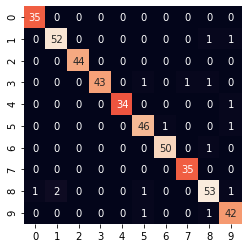

In [10]:
#查看模型的混淆矩阵，可以看出模型哪些地方做的不够好
lr_cm = confusion_matrix(test_y, predict_y)
sns.heatmap(lr_cm, square=True, annot=True, cbar=False)
